### Download Dataset

In [1]:
import opendatasets as od
import pandas as pd

In [2]:
od.download("https://www.kaggle.com/datasets/marshalpatel3558/diabetes-prediction-dataset-legit-dataset","../data")

Skipping, found downloaded files in "../data\diabetes-prediction-dataset-legit-dataset" (use force=True to force download)


In [3]:
diabetes_dataset = pd.read_csv("../data/diabetes-prediction-dataset-legit-dataset/Dataset of Diabetes .csv")

### About Dataset

In [4]:
diabetes_dataset.head(5)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [5]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [6]:
list_class = diabetes_dataset['CLASS'].unique()
list_gender = diabetes_dataset['Gender'].unique()
print(f'The dataset present some errors like diferents terms to same class.\nFor label CLASS: {list_class}\nFor label Gender: {list_gender}')

The dataset present some errors like diferents terms to same class.
For label CLASS: ['N' 'N ' 'P' 'Y' 'Y ']
For label Gender: ['F' 'M' 'f']


In [7]:
diabetes_dataset['CLASS'] = diabetes_dataset['CLASS'].apply(lambda x: str.upper(x).strip())
diabetes_dataset['Gender'] = diabetes_dataset['Gender'].apply(lambda x: str.upper(x))

In [8]:
list_class = diabetes_dataset['CLASS'].unique()
list_gender = diabetes_dataset['Gender'].unique()
print(f'The dataset present some errors like diferents terms to same class.\nFor label CLASS: {list_class}\nFor label Gender: {list_gender}')

The dataset present some errors like diferents terms to same class.
For label CLASS: ['N' 'P' 'Y']
For label Gender: ['F' 'M']


### Apply XGBoost on the Dataset

#### Categorical Encoding

In [9]:
diabetes_dataset = diabetes_dataset.drop(columns=['ID', 'No_Pation'])

In [10]:
df_diabetes = pd.get_dummies(diabetes_dataset, columns=['Gender'], dtype=int)
cols = [col for col in df_diabetes.columns if col != 'CLASS'] + ['CLASS']
df_diabetes = df_diabetes[cols]

Using Label encoder in 'CLASS' column

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_diabetes['CLASS'] = le.fit_transform(df_diabetes['CLASS'])

In [12]:
df_diabetes.head()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender_F,Gender_M,CLASS
0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1,0,0
1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0,1,0
2,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1,0,0
3,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1,0,0
4,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0,1,0


#### Dataset Splitting

In [13]:
from sklearn.model_selection import train_test_split

X = df_diabetes.drop('CLASS', axis=1)
y = df_diabetes['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### The Algorithm

In [14]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()

xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [15]:
predictions = xgb_classifier.predict(X_test)
predictions_labels = le.inverse_transform(predictions)
predictions_labels

array(['P', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'P', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'P', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'P', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'P', 'Y', 'P', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'P', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'P', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'P', 'Y', 'Y', 'Y', 'Y', 'Y

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      0.90      0.95        10
           2       0.99      1.00      0.99       169

    accuracy                           0.99       200
   macro avg       1.00      0.95      0.97       200
weighted avg       0.99      0.99      0.99       200



#### Saving model to apply in Streamlit

In [17]:
import os

os.makedirs('../data/models', exist_ok=True)

xgb_classifier.save_model("../data/models/diabetes_classifier3Classes.json")

## Using SHAP

In [18]:
import shap

c:\Users\ander\Documents\codes\pythonProjects\codes_paperPPG\semana02PPG\predicting-diabetes-with-xgboost\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
explainer = shap.Explainer(xgb_classifier, X_train)
shap_values = explainer(X_test)

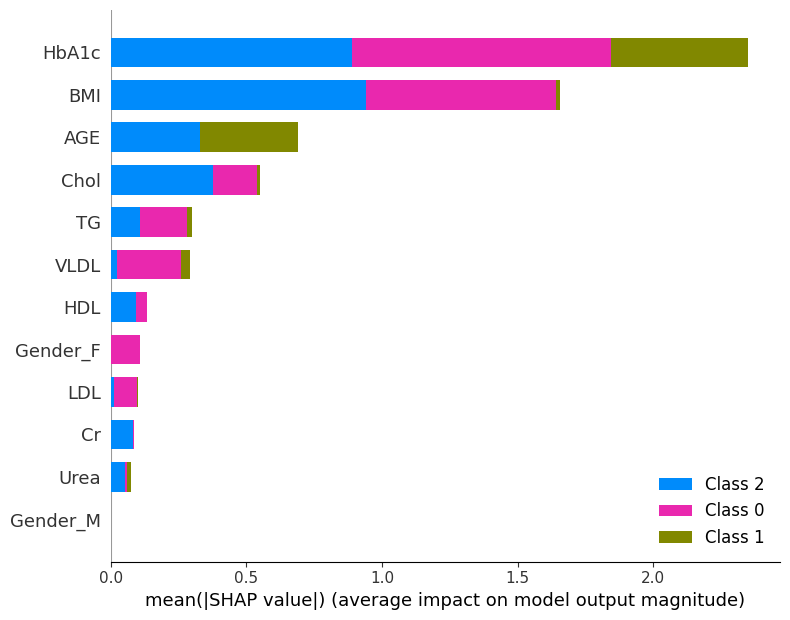

In [20]:
shap.summary_plot(shap_values, X_test)

In [27]:
print(X_test.columns.tolist())

['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'Gender_F', 'Gender_M']


### References

- [Dive into XGBoost and Scikit-learn: Machine Learning with XGBoost and Scikit-learn](https://medium.com/@bravinwasike18/dive-into-xgboost-and-scikit-learnmachine-learning-with-xgboost-and-scikit-learn-17e2cf54f3a3)
- [XGBoost Mathematics Explained](https://dimleve.medium.com/xgboost-mathematics-explained-58262530904a)
- [Unveiling Mathematics Behind XGBoost](https://www.kdnuggets.com/2018/08/unveiling-mathematics-behind-xgboost.html)
- [Understanding the log loss function of XGBoost](https://medium.datadriveninvestor.com/understanding-the-log-loss-function-of-xgboost-8842e99d975d)